## Setup evnironment

In [1]:
import os
import numpy as np
import pandas as pd
import json
from skimage.io import imread

In [2]:
from psf import compute, plotPSF, plotAvg

## Setup plotting

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper', font_scale=2.0)
sns.set_style('ticks')

In [4]:
# from IPython.html.widgets import interactive
# from IPython.html.widgets import IntSliderWidget 
from ipywidgets import interact, fixed
import ipywidgets as widgets
from IPython.display import display

## Define parameters

In [5]:
FOVumLat = 61.0
FOVpxLat = 512.0 # 512
pxPerUmLat = FOVpxLat/FOVumLat
pxPerUmAx = 2.0 # 2.0
wavelength = 970.0
NA = 0.6
windowUm = [12, 2, 2]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'wavelength':970.0, 'NA':0.6, 'windowUm':windowUm}
options['thresh'] = .05

In [6]:
options

{'FOVumLat': 61.0,
 'FOVpxLat': 512.0,
 'pxPerUmLat': 8.39344262295082,
 'pxPerUmAx': 2.0,
 'wavelength': 970.0,
 'NA': 0.6,
 'windowUm': [12, 2, 2],
 'thresh': 0.05}

## Get PSF

In [7]:
im = imread('./data/images.tif', plugin='tifffile')   

In [8]:
data, beads, maxima, centers, smoothed = compute(im, options)

In [9]:
PSF = pd.concat([x[0] for x in data])
PSF['Max'] = maxima
PSF = PSF.reset_index().drop(['index'],axis=1)
latProfile = [x[1] for x in data]
axProfile = [x[2] for x in data]

In [10]:
PSF

,FWHMlat,FWHMax,Max
0,1.012770,4.451998,816
1,0.971968,4.633858,512
2,0.974878,4.567987,525
3,0.976221,4.484692,346
4,0.960270,4.498970,309
5,0.994891,4.538817,275
6,1.009600,5.046590,300
7,0.992628,4.448240,166
8,0.999875,4.315810,179
9,0.927706,4.929884,165


In [11]:
# print len(PSF)
# print PSF.mean()
# print PSF.std()
print(len(PSF))
print(PSF.mean())
print(PSF.std())

14
FWHMlat      0.952360
FWHMax       4.772268
Max        291.214286
dtype: float64
FWHMlat      0.062166
FWHMax       0.429982
Max        204.677675
dtype: float64


## Plot max projection

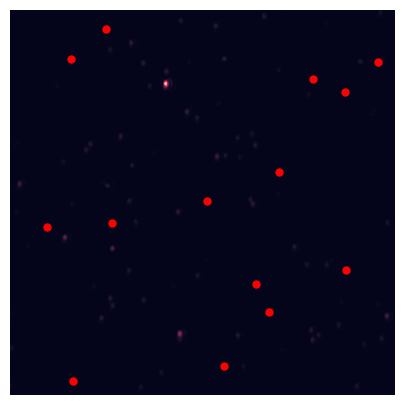

In [12]:
plt.figure(figsize=(5,5));
plt.imshow(smoothed);
plt.plot(centers[:, 2], centers[:, 1], 'r.', ms=10);
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off');

## Plot max projection

In [13]:
beadInd = 1
average = beads[beadInd]

In [14]:
# plane = IntSliderWidget(min=0, max=average.shape[0]-1, step=1, value=average.shape[0]/2)
# interactive(plotAvg, i=plane)
interact(plotAvg, i=widgets.IntSlider(min=-(average.shape[0]-1), max=average.shape[0]-1, step=1, value=average.shape[0]/2), average = fixed(average));

interactive(children=(IntSlider(value=24, description='i', max=47, min=-47), Output()), _dom_classes=('widget-…

## Plot 2D slices

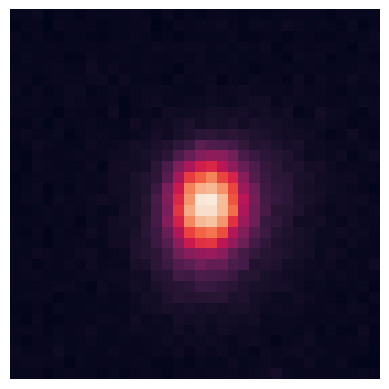

In [15]:
plt.imshow(average.mean(axis=0));
plt.axis('off');

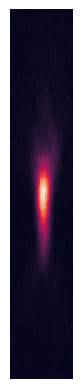

In [16]:
plt.imshow(average.mean(axis=1), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

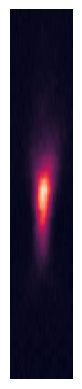

In [17]:
plt.imshow(average.mean(axis=2), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

## Plotting

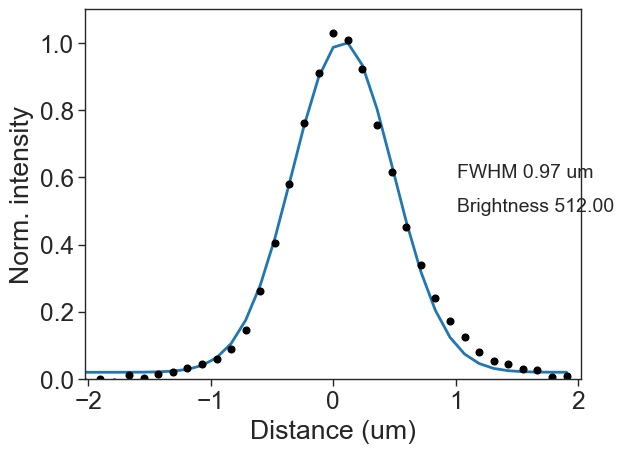

In [18]:
plotPSF(latProfile[beadInd][0],latProfile[beadInd][1],latProfile[beadInd][2],latProfile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])

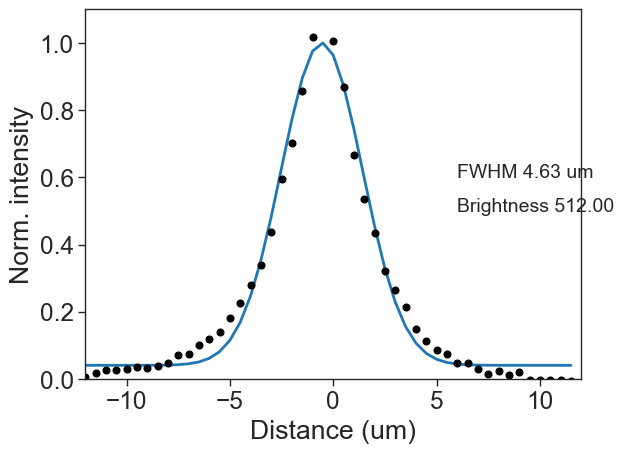

In [19]:
plotPSF(axProfile[beadInd][0],axProfile[beadInd][1],axProfile[beadInd][2],axProfile[beadInd][3],pxPerUmAx,PSF.Max.iloc[beadInd])